<h1><center> WebScraping </h1>
<h1><center> Anno Accademico 2022-2023 </h1>
<h1><center>  Docente: Laura Ricci </h1>
<h1><center>  Lezione 7 </h1>
<h1><center>  Plotting in Pandas e Matplotlib </h1>
<h1><center> 14 Febbraio 2023 </h1>

# La gerarchia dei Moduli

<center>
<img src="Figures/Hierarchy.jpg" style="width:400px;height:400px;"/>

# Struttura della lezione

* due obiettivi
    * funzioni avanzate di plotting in Matplotlib
    * esempi con i dataset presentati nelle lezioni precedenti
* riflettere sulla gerarchia dei moduli
    * alcuni oggetti Pandas possono essere visti come oggetti Python
    * funzioni di plotting di Pandas: un wrapper costruito "sopra Matplotlib"
    * cosa implica questo?

# Il Data Set di riferimento: *crypto-markets.csv* 

* Una riga per ogni giorno in un periodo compreso tra 
    * *slug* : nome della cryptocurrency
    * *symbol* : simbolo della cryptocurrency
    * *name* : nome della cryptocurrency
    * *date*: data dell'osservazione
    * *ranknow* : rank della cryptocurrency in quella data
    * *open* : prezzo di apertura in quella data
    * *high* : prezzo più alto in quella data
    * *low* : prezzo più basso in quella data
    * *close* : prezzo di chiusura in quella data
    * *volume*: volume delle transazioni in quella data
    * *market* : capitalizzazione di mercato in USD
    * *close_ratio*: (close-low)/(high-low)
    * *spread* : differenza tra il prezzo più alto e quello più basso in quella data
* periodo coperto: *2013-2018* 
* dimensione: circa *62 Mega*

# Il Data Set di riferimento: *crypto-markets.csv* 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df_crypto = pd.read_csv('Dataset/crypto-markets.csv')
df_crypto['date'] = pd.to_datetime(df_crypto['date'])
df_crypto.info()
df_crypto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679183 entries, 0 to 679182
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   slug         679183 non-null  object        
 1   symbol       679183 non-null  object        
 2   name         679183 non-null  object        
 3   date         679183 non-null  datetime64[ns]
 4   ranknow      679183 non-null  int64         
 5   open         679183 non-null  float64       
 6   high         679183 non-null  float64       
 7   low          679183 non-null  float64       
 8   close        679183 non-null  float64       
 9   volume       679183 non-null  int64         
 10  market       679183 non-null  float64       
 11  close_ratio  665926 non-null  object        
 12  spread       679183 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 67.4+ MB


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
0,bitcoin,BTC,Bitcoin,2013-04-28,1,135.30,135.98,132.10,134.21,0,1.500520e+09,0.5438,3.88
1,bitcoin,BTC,Bitcoin,2013-04-29,1,134.44,147.49,134.00,144.54,0,1.491160e+09,0.7813,13.49
2,bitcoin,BTC,Bitcoin,2013-04-30,1,144.00,146.93,134.05,139.00,0,1.597780e+09,0.3843,12.88
3,bitcoin,BTC,Bitcoin,2013-05-01,1,139.00,139.89,107.72,116.99,0,1.542820e+09,0.2882,32.17
4,bitcoin,BTC,Bitcoin,2013-05-02,1,116.38,125.60,92.28,105.21,0,1.292190e+09,0.3881,33.32


# Reduced_crypto:  un DataFrame ridotto

* costruiamo un dataset ridotto contenete
    * solo transazioni di *Bitcoin*
    * che sono state effettuate nell'anno *2017*
* utilizziamo le funzioni del livello *Pandas*

In [2]:
reduced_crypto = df_crypto.loc[(df_crypto['name'] == 'Bitcoin') & df_crypto["date"].isin(pd.date_range("2017-01-01", "2018-01-01"))]
print(type(df_crypto['name'] == 'Bitcoin'))
reduced_crypto.head()

<class 'pandas.core.series.Series'>


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1344,bitcoin,BTC,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,1.549120e+10,0.893,44.38
1345,bitcoin,BTC,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,1.605510e+10,0.7221,34.69
1346,bitcoin,BTC,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,1.642660e+10,0.9893,22.48
1347,bitcoin,BTC,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,1.679540e+10,0.9592,115.02
1348,bitcoin,BTC,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,1.860400e+10,0.3668,280.68


* per selezionare le righe si utilizza la notazione *Panda* 
  

# Reduced_crypto:  un DataFrame ridotto

* costruiamo un dataset ridotto contenete
    * solo transazioni di *Bitcoin*
    * che sono state effettuate nell'anno *2017*
* utilizziamo le funzioni del livello *Python*

In [3]:
reduced_crypto = df_crypto.loc[(df_crypto.name == 'Bitcoin') & (df_crypto.date.isin(pd.date_range("2017-01-01", "2018-01-01")))]

print(type(df_crypto.name))

reduced_crypto.head()

<class 'pandas.core.series.Series'>


,slug,symbol,name,date,ranknow,open,high,low,close,volume,market,close_ratio,spread
1344,bitcoin,BTC,Bitcoin,2017-01-01,1,963.66,1003.08,958.70,998.33,147775000,1.549120e+10,0.893,44.38
1345,bitcoin,BTC,Bitcoin,2017-01-02,1,998.62,1031.39,996.70,1021.75,222185000,1.605510e+10,0.7221,34.69
1346,bitcoin,BTC,Bitcoin,2017-01-03,1,1021.60,1044.08,1021.60,1043.84,185168000,1.642660e+10,0.9893,22.48
1347,bitcoin,BTC,Bitcoin,2017-01-04,1,1044.40,1159.42,1044.40,1154.73,344946000,1.679540e+10,0.9592,115.02
1348,bitcoin,BTC,Bitcoin,2017-01-05,1,1156.73,1191.10,910.42,1013.38,510199000,1.860400e+10,0.3668,280.68


* tutto in Python è un *oggetto*
* anche *df_crypto* è un oggetto *Ptyhon*
* *df_crypto.name*: indica un *attributo* dell'oggetto *reduced

# Plotting con Pandas 

* possibile plottare direttamente un *DataFrame*
    * invocazione della funzione *plot* di *Pandas* su un oggetto di tipo *DataFrame*
    * indicazione della *Series* che si devono utilizzare per le *ascisse* e della (o delle series) che si devono utilizzare per le *ordinate*
*  il metodo *plot()* invocato su un *DataFrame* di *Pandas* è di fatto un wrapper per il metodo *pyplot.plot()* di *Matplotlib*

<AxesSubplot: xlabel='date'>

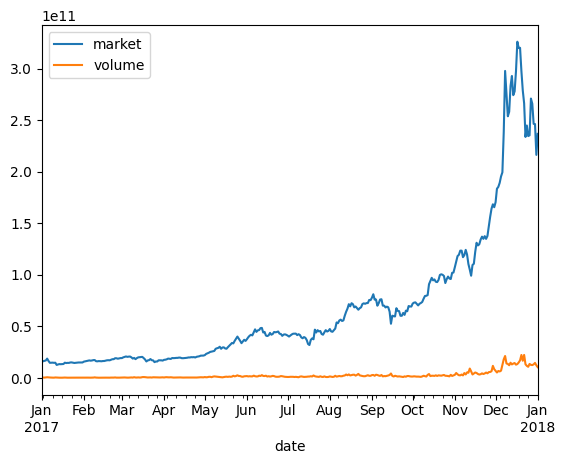

In [4]:
reduced_crypto.plot(x ="date", y=['market','volume'])

# Plotting con Matplotlib

* invocare il metodo *plot* sull'oggetto *pyplot* di *MatplotLib*
    * passare oggetti di tipo *Series* per le ascisse e per le ordinate
    * utilizzare i metodi definito da Matplotlib*
* il risultato è il solito
* i metodi di *Pandas* possono semplificare il codice, in molti casi

<class 'pandas.core.series.Series'>


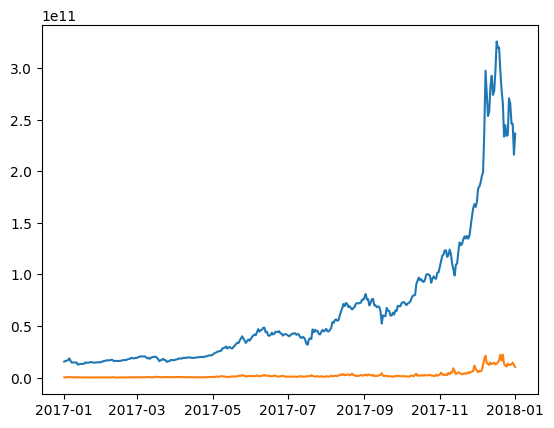

In [5]:
print(type(reduced_crypto["date"]))
plt.plot(reduced_crypto["date"], reduced_crypto["market"])
plt.plot(reduced_crypto["date"], reduced_crypto["volume"])

# *pyplot.plot()*: i parametri

<center>
<img src="Figures/Parameters.jpg" style="width:400px;height:1000px;"/>

# *pyplot.plot()*: i colori

<center>
<img src="Figures/Colors.jpg" style="width:500px;height:500px;"/>

# Plotting con Matplotlib

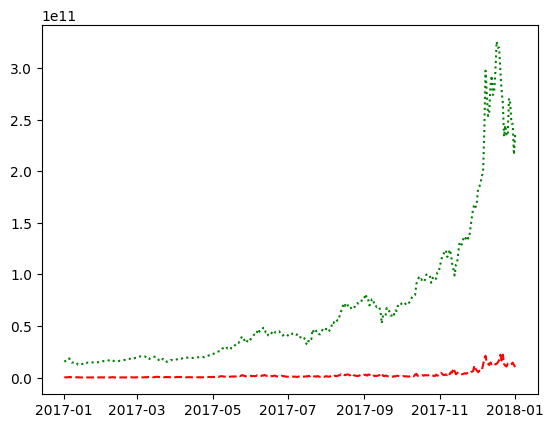

In [40]:
plt.plot(reduced_crypto["date"], reduced_crypto["market"], ":g")
plt.plot(reduced_crypto["date"], reduced_crypto["volume"], "--r")

# Matplotlib: caratteristiche generali

* plotting library, con funzionalità simili a 
    
    * *GNUplot*
    * una valida alternativa a *MATLAB* quando utilizzata in combinazione con *Numpy* o *Scipy*
    * *MATLAB* libreria proprietaria
    * vantaggio di *Matplotlib*: integrazione con Python!

* object oriented
    * ma il sotto-modulo *pyplot* della libreria offre una interfaccia *procedurale* alle funzionalità *object oriented*
    * *pyplot* generalmente rinominato come *plt* (come negli esempi precedenti


# Matplotlib: cosa abbiamo già visto

* tipi base di plots
    * line plot
    * bar plot
    * histograms
    * scatter plot

* ancora due...
    * stack plot
    * pie plot

# Matplotlib: pie chart

* si vuole descrivere con un pie chart il valore di mercato delle prime 5 cryptocurrencies, considerando il loro valore di mercato
* il valore di mercato di riferimento è quello dell'ultima rilevazione del DataSet
* utilizzeremo funzioni *group_by* e *last()*

# Approfondimenti: group_by e last

* Pandas *group_by*
    * raggruppare i dati in base a una o a più colonne
    * calcolare statistiche come
        * contare gli elementi del gruppo
        * media
        * min, max
        * count

* dato un dataframe *df*, la sintassi generale è la seguente
     * *df.groupby('Col1')['Col2'].op()*
         * *Col1* colonna su cui si formano i gruppi (possibile indicare più di una colonna)
         * *Col2* colonna su cui si vuole calcolare l'aggregazione, per ogni gruppo restituito
         * op() operazione di aggregazione

* possibile anche trovare anche il primo, l'ultimo o l'n-esimo elemento di ogni gruppo restituito dalla *group_by*
    * *df.groupby('Col1')['Col2'].last()*

# Matplotlib: pie chart, preparazione dei dati

In [7]:
top_5_currency_names = df_crypto.groupby('name')['volume'].last().sort_values(ascending=False).head(5).index

top_5_currency_volumes = df_crypto.groupby('name')['volume'].last().sort_values(ascending=False).head(5).values

print(type(df_crypto.groupby('name')['volume'].last()))

# dovo avere applicato l'operatore *last* a ogni gruppo, si ottiene un oggetto di tipo Series
# questo oggetto rappresenta l'utlimo volume rilevato per ogni cryptomoneta
# utilizzo le proprietà index e values dell'oggetto Series

print(top_5_currency_names)
print(top_5_currency_volumes)

<class 'pandas.core.series.Series'>
Index(['Bitcoin', 'Ethereum', 'Tether', 'Ripple', 'Litecoin'], dtype='object', name='name')
[9285290000 4269530000 4078980000 1286180000  844678000]


# Matplotlib: pie chart, visualizzazione volume transazioni

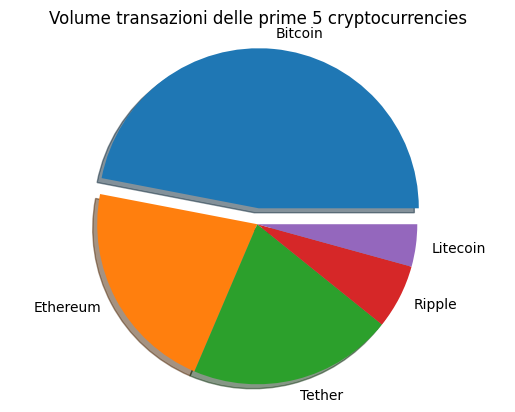

In [8]:
explode = (0.1, 0, 0, 0, 0) 
plt.pie(top_5_currency_volumes, explode=explode, labels=top_5_currency_names, shadow=True, startangle=0)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Volume transazioni delle prime 5 cryptocurrencies')
plt.show()

# Matplotlib: pie chart, visualizzazione volume mercato

<class 'pandas.core.series.Series'>


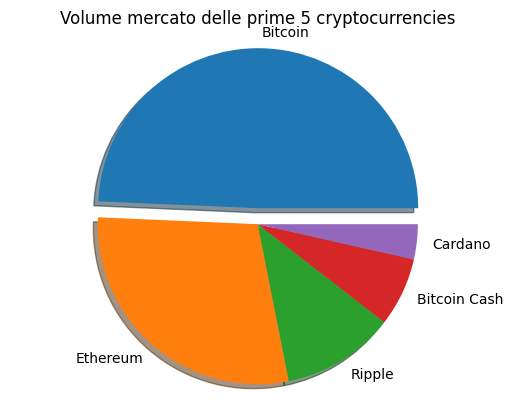

In [9]:
top_5_currency_names = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).index
top_5_currency_markets = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).values
print(type(df_crypto.groupby('name')['market'].last()))
explode = (0.1, 0, 0, 0, 0) 
plt.pie(top_5_currency_markets, explode=explode, labels=top_5_currency_names, shadow=True, startangle=0)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Volume mercato delle prime 5 cryptocurrencies')
plt.show()

# Matplotlib: stackplots

*  *stackplot*: un pie chart "temporale"

<class 'pandas.core.series.Series'>
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


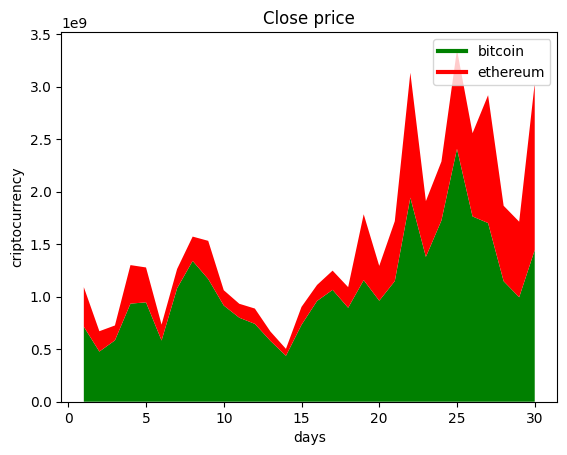

In [10]:
mask = (df_crypto.date >= pd.Timestamp('2017-05-01')) & (df_crypto.date <= pd.Timestamp('2017-05-30'))
df_reduced_stack= df_crypto.loc[mask]

bitcoin=df_reduced_stack[df_reduced_stack['name']=='Bitcoin'].volume
print(type(bitcoin))
ethereum=df_reduced_stack[df_reduced_stack['name']=='Ethereum'].volume

days=[*range(1,31,1)]
print(days)

plt.plot([],[],color='green', label='bitcoin', linewidth=3)
plt.plot([],[],color='red', label='ethereum', linewidth=3)
plt.xlabel('days')
plt.ylabel('criptocurrency')
plt.title('Close price')
plt.legend()

plt.stackplot(days, bitcoin, ethereum, colors=['green','red'])

plt.show()


# Matplotlib: ancora stackplots

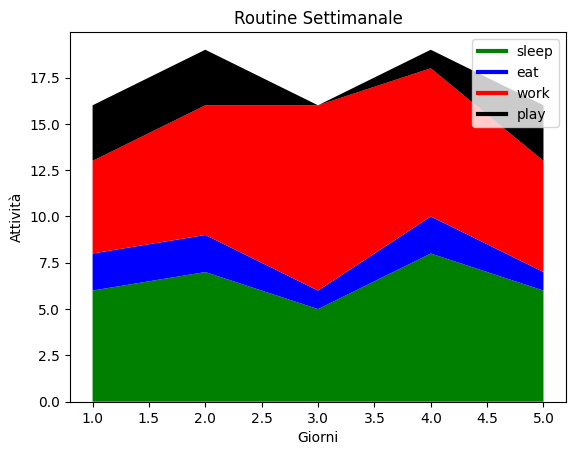

In [11]:
days = [1,2,3,4,5]
sleep = [6,7,5,8,6]
eat =   [2,2,1,2,1]
work =  [5,7,10,8,6]
exercise=  [3,3,0,1,3]


plt.plot([],[],color='green', label='sleep', linewidth=3)
plt.plot([],[],color='blue', label='eat', linewidth=3)
plt.plot([],[],color='red', label='work', linewidth=3)
plt.plot([],[],color='black', label='play', linewidth=3)

plt.xlabel('Giorni')
plt.ylabel('Attività')
plt.title('Routine Settimanale')
plt.legend()

plt.stackplot(days, sleep, eat, work, exercise, colors=['green','blue','red','black'])

plt.show()

# Matplotlib: organizzazione gerarchica

* ogni oggetto *Matplotlib* è organizzato gerarchicamente, secondo una struttura "tree-like"
* alla radice della gerarchia esiste un oggetto *figura*
* *figura*
    * container che contiene uno o più plot
* *axes* 
    * sinomimo di plot, plot area
    * il termine può creare un pò di confusione, perchè indica non solo gli assi della zona di plot, ma tutta la zona
* l'invocazione del metodo *subplots* crea una figura, al livello top, e uno o più di un plot

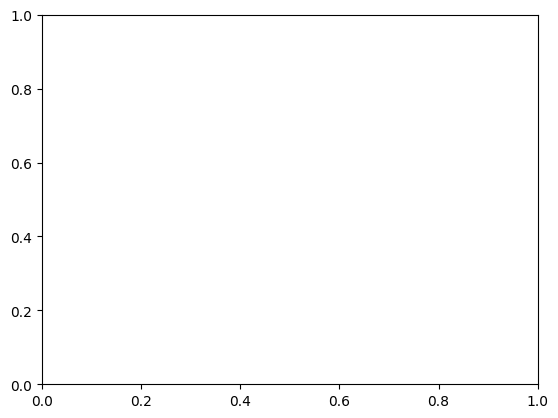

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

* in questo caso, invocando *subplots* senza parametri, viene creata una figura con un solo "plot*, *axes*

# Matplotlib: struttura del pannello

<center>
<img src="Figures/MatlabPlot.jpg" style="width:1000px;height:600px;"/>

# Matplotlib: organizzazione gerarchica


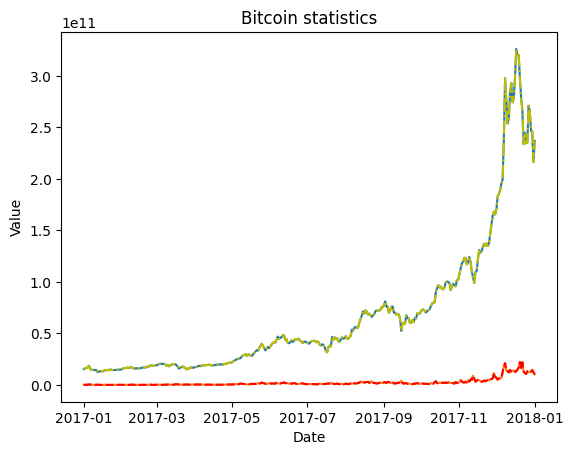

In [13]:
X= reduced_crypto["date"]
Y= reduced_crypto["market"]
Z= reduced_crypto["volume"]
fig,ax = plt.subplots()
ax.set(xlabel='Date', ylabel='Value', title='Bitcoin statistics')
ax.plot(X,Y,
        X,Y,"-.y",
        X,Z,
        X,Z,"--r")
plt.show()


* il plot è simile al precedente, solo che ora si lavora sull'oggetto *ax*, piuttosto che sull'oggetto *plt*

# Matplotlib: pie chart affiancati

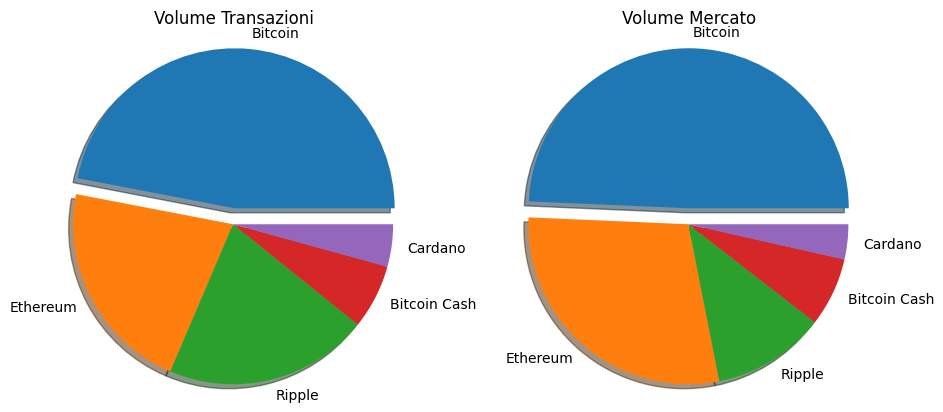

In [14]:
fig, (ax1,ax2) = plt.subplots(1,2, sharey= 'row')

plt.subplots_adjust(wspace=10)


explode = (0.1, 0, 0, 0, 0) 
ax1.pie(top_5_currency_volumes, explode=explode, labels=top_5_currency_names, shadow=True, startangle=0)
ax1.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Volume Transazioni")

explode = (0.1, 0, 0, 0, 0) 
ax2.pie(top_5_currency_markets, explode=explode, labels=top_5_currency_names, shadow=True, startangle=0)
ax2.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title("Volume Mercato")

plt.show()

# Matplotlib: ticks

Text(17167.0, 0, '2017-01')
Text(17226.0, 0, '2017-03')
Text(17287.0, 0, '2017-05')
Text(17348.0, 0, '2017-07')
Text(17410.0, 0, '2017-09')
Text(17471.0, 0, '2017-11')
Text(17532.0, 0, '2018-01')


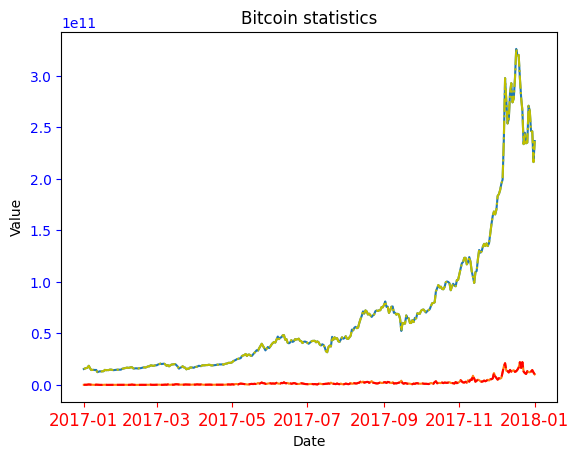

In [15]:
X= reduced_crypto["date"]
Y= reduced_crypto["market"]
Z= reduced_crypto["volume"]
fig,ax = plt.subplots()

ax.set(xlabel='Date', ylabel='Value', title='Bitcoin statistics')

ax.plot(X,Y,
        X,Y,"-.y",
        X,Z,
        X,Z,"--r")

for xtick in ax.get_xticklabels():
    print(xtick)
for xtick in ax.get_xticklabels():
    xtick.set_fontsize(12)
ax.tick_params(axis='x', colors='red')
ax.tick_params(axis='y', colors='blue')
plt.show()

# Matplotlib: le annotazioni

* annotazioni sono utilizzate per "attirare" l'attenzione del lettore verso particolari punti del plot

* la annotazione può comprendere del testo, etichette e/o frecce

* si utilizza il metodo *annotate* dell'oggetto *axes*



# Matplotlib: le annotazioni

* consideriamo l'esercizio dell'ultimo assignment

In [16]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv", 
encoding = 'unicode_escape', parse_dates=['Date'])

data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

* l'esercizio

    * trovare tutte le biciclette prenotate in una data, dalle 8:00 alle 20:00

    * plottare l'andamento delle prenotazioni nelle varie ora di quel giorno, in quell'intervallo di ore

    * nuovo requisito
        * **evidenziale nel grafo l'ora in cui si è avuto il numero minimo e, rispettivamente il numero massimo di noleggi,                 insieme con il rispettivo valore**

# Annotazioni: preparazione  dei dati per il plot

In [17]:
# creare un nuovo DataFrame con le sole colonne di interesse
date_hour_bikes = data.loc[:,["Date", "Hour", "Rented Bike Count"]]
date_hour_bikes.head()

# estrarre solo le righe relative al giorno di interesse
interesting_date = "2017-08-12"
only_interesting_date = date_hour_bikes.loc[date_hour_bikes['Date'] == interesting_date]

# impostare l'ora iniziale e l'ora finale
starttime = 8
endtime = 20
mask = (only_interesting_date['Hour'] >= starttime) & (only_interesting_date['Hour'] <= endtime)
starttime_to_endtime = only_interesting_date.loc[mask]
starttime_to_endtime

,Date,Hour,Rented Bike Count
176,2017-08-12,8,780
177,2017-08-12,9,395
178,2017-08-12,10,261
179,2017-08-12,11,310
180,2017-08-12,12,355
181,2017-08-12,13,354
182,2017-08-12,14,350
183,2017-08-12,15,362
184,2017-08-12,16,401
185,2017-08-12,17,500


# Preparazione dei dati per il plot

In [18]:
x1 = starttime_to_endtime  ['Hour']
y1 = starttime_to_endtime  ['Rented Bike Count']

l_hour=list(x1)
y_rental= list(y1)
l_tuples=[]

for i in range(0,len(l_hour)):
    l_tuples.append((l_hour[i], y_rental[i]))
print (l_tuples)
#ricerca minimo    
min_rent= min(y_rental)
indexmin =y_rental.index(min_rent)
#ricerca massimo
max_rent= max(y_rental)
indexmax =y_rental.index(max_rent)
print(indexmax)
print(l_hour[indexmax])


[(8, 780), (9, 395), (10, 261), (11, 310), (12, 355), (13, 354), (14, 350), (15, 362), (16, 401), (17, 500), (18, 752), (19, 477), (20, 384)]
0
8


# Plot dei dati: annotare il plot

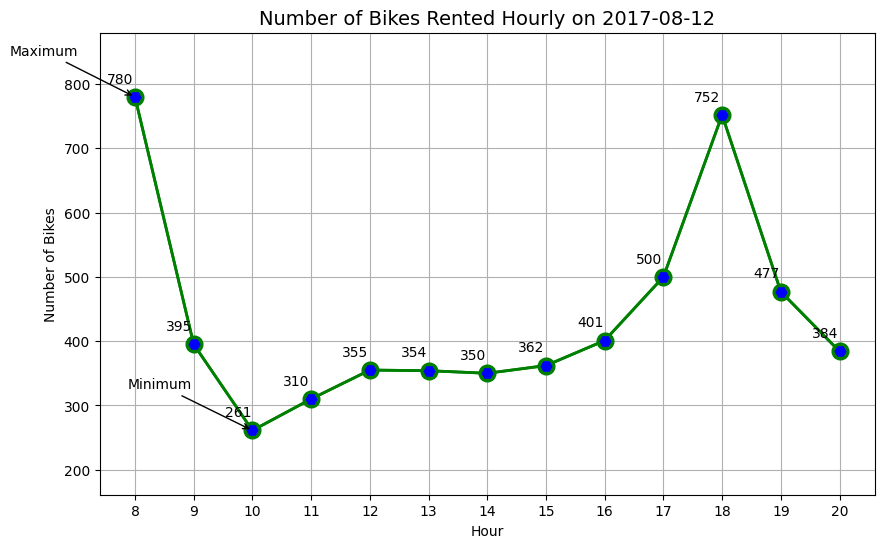

In [19]:
fig, ax = plt.subplots(1,1,figsize = (10,6))

for h,b in l_tuples:
    ax.annotate(str(b), xy=(h,b), xytext=(-20,10), textcoords='offset points')
    
ax.plot(l_hour, y_rental, color='green', marker='o', linestyle='solid', linewidth=2, markersize=12)

ax.annotate('Minimum', xy=(l_hour[indexmin],y_rental[indexmin]), xycoords = 'data',
            xytext = (-90, 30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )


ax.annotate('Maximum', xy = (l_hour[indexmax],y_rental[indexmax]) , xycoords = 'data', xytext = (-90, 30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )
    
ax.grid(True)
ax.set_ylim(min(y1)-100, max(y1)+100)
ax.set_xlabel("Hour")
ax.set_ylabel("Number of Bikes")
ax.set_title("Number of Bikes Rented Hourly on %s" % interesting_date, fontsize = 14)
ax.set_xticks(x1)
ax.plot(x1, y1, color='green', marker='H', markerfacecolor='blue', linestyle='solid', linewidth=2, markersize=10)

# Matplotlib: le annotazioni

* consideriamo un'altra statistica da calcolare sul dataset del noleggio delle biciclette di Seoul

* per ogni ora del giorno, calcolare il totale delle biciclette noleggiate in quell'ora considerando l'intero periodo contenuto nel dataset
      
      * estrazione delle due colonne corrispondeti all'ora e alla data
      
      * raggruppamento poer ora 
      
      * somma del numero di righe per ogni ora

# Preparazione dei dati per il plotting

In [20]:
#costruiamo un dataframe con solo ora e numero di biciclette noleggiate

hours_bikes = data[['Rented Bike Count', 'Hour']]


# Raggruppiamo le righe del DatFrame in base all'ora

hourly_rented_sum = (hours_bikes.groupby(['Hour'], as_index = False)).sum()

#for i, d in hourly_rented:
#    print (i, d)

# Find the sum of bikes rented every hour 
# hourly_rented_sum = hourly_rented.sum()

# Get the x and y data from dataframe you created 
hour_year = hourly_rented_sum['Hour']
rented_year = hourly_rented_sum['Rented Bike Count']
l_hour_year=list(hour_year)
l_rented_year=list(rented_year)

l_couples_year=[]

for i in range(0,len(l_hour_year)):
    l_couples_year.append((l_hour_year[i], l_rented_year[i]))

#ricerca minimo    
min_rent= min(l_rented_year)
indexmin =l_rented_year.index(min_rent)
#ricerca massimo
max_rent= max(l_rented_year)
indexmax =l_rented_year.index(max_rent)

# Plotting dei dati

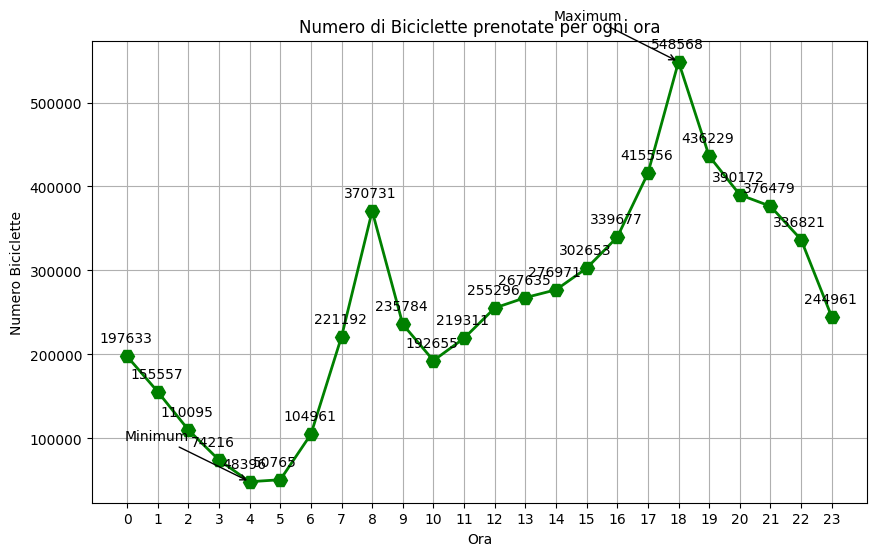

In [21]:
fig, ax = plt.subplots(1,1,figsize = (10,6))
# print(l_hour_year)
# print(l_rented_year)
for h,b in l_couples_year:
   ax.annotate(str(b), xy=(h,b), xytext=(-20,10), textcoords='offset points')
      
ax.plot(l_hour_year, l_rented_year, color='green', marker='H', linestyle='solid', linewidth=2, 
         markersize=10)

ax.annotate('Minimum', xy=(l_hour_year[indexmin],l_rented_year[indexmin]), xycoords = 'data',
          xytext = (-90, 30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )


ax.annotate('Maximum', xy = (l_hour_year[indexmax],l_rented_year[indexmax]) , xycoords = 'data', xytext = (-90, 30), textcoords = 'offset points', arrowprops=dict(arrowstyle = "->") )
    
ax.grid(True)
ax.set_xlabel("Ora")
ax.set_ylabel("Numero Biciclette")
ax.set_title("Numero di Biciclette prenotate per ogni ora")
ax.set_xticks(l_hour_year)

plt.show()


# Bar Plots

* un iniseme di rettangoli perpendicolari all'asse delle x

* ampiezza del rettangolo non significativa

* altezza del rettangolo signinfivativa


# Bar Plots

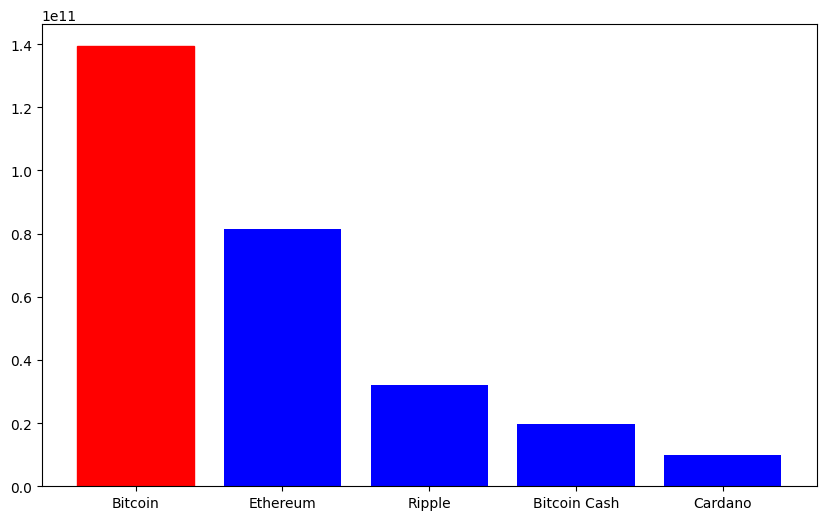

In [22]:
top_5_currency_names = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).index

top_5_currency_markets = df_crypto.groupby('name')['market'].last().sort_values(ascending=False).head(5).values

fig, ax = plt.subplots(1,1,figsize = (10,6))

bars=ax.bar(top_5_currency_names , top_5_currency_markets,  color= "blue")

bars[0].set_color('red')

# Grouped Bar Plots

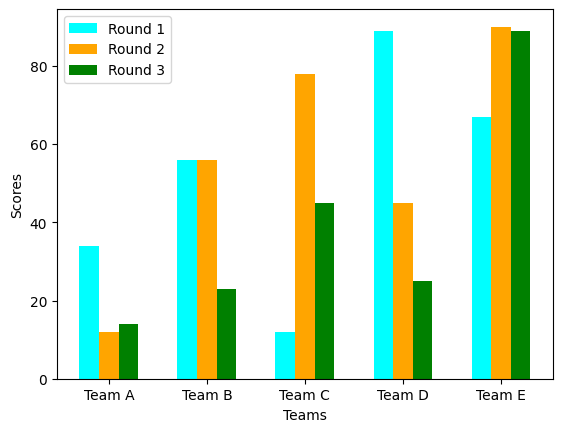

In [25]:

import matplotlib.pyplot as plt
import numpy as np

x=np.array([1, 2, 3, 4, 5])
y1 = [34, 56, 12, 89, 67]
y2 = [12, 56, 78, 45, 90]
y3 = [14, 23, 45, 25, 89]
width = 0.2
  
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+0.2, y3, width, color='green')
plt.xticks(x, ['Team A', 'Team B', 'Team C', 'Team D', 'Team E'])
plt.xlabel("Teams")
plt.ylabel("Scores")
plt.legend(["Round 1", "Round 2", "Round 3"])
plt.show()




# Grouped Bar Plots

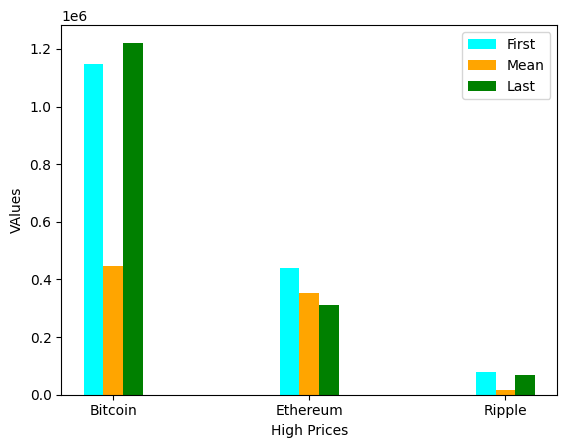

In [39]:

import matplotlib.pyplot as plt
import numpy as np

x=np.array([10, 20, 30])
top_3_currency_first = df_crypto.groupby('name')['high'].first().sort_values(ascending=False).head(3).values
y1=list (top_3_currency_first)
top_3_currency_max = df_crypto.groupby('name')['high'].mean().sort_values(ascending=False).head(3).values
y2=list (top_3_currency_max)
top_3_currency_last = df_crypto.groupby('name')['high'].last().sort_values(ascending=False).head(3).values
y3=list (top_3_currency_last)
width = 1
plt.bar(x-1, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.bar(x+1,y3, width, color='green')
plt.xticks(x, ['Bitcoin', 'Ethereum', 'Ripple'])
plt.xlabel("High Prices")
plt.ylabel("VAlues")
plt.legend(["First", "Mean", "Last"])
plt.show()





# Plotting in Pandas

* nelle lezioni inziali abbiamo visto la funzion *plot()* del modulo *pyplot()*, per disegnare grafici
* a partire dalla versione *0.17* di *Pandas*  
    * è stato definito per gli oggetti *Series* e *Dataframe* di *Pandas* un proprio metodo *plot()*
        * un "wrapper" definito sulla funzione *plot()* di *pyplot()*
    * *s.plot()*
    * *df.plot()*

# Plotting in Pandas: un esempio

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_csv('DataSet/Apples.csv')
df.head()

,Week1,Week2,Week3,Day
0,5000,4000,4000,Monday
1,5900,3000,5800,Tuesday
2,6500,5000,3500,Wednesday
3,3500,5500,2500,Thursday
4,4000,3000,3000,Friday


# Plotting in Pandas: un esempio

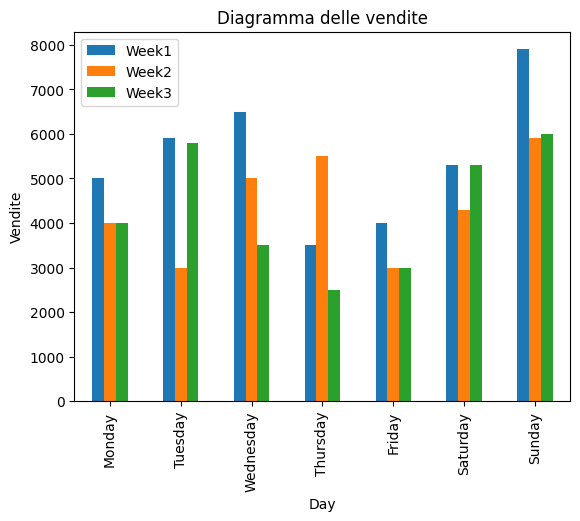

In [29]:
df.plot(kind='bar',x='Day',title='Diagramma delle vendite')
# set title and set ylabel
plt.ylabel('Vendite')
plt.show()

# Plotting in Pandas: il prezzo di Bitcoin

In [30]:
reduced_crypto = df_crypto.loc[(df_crypto.name == 'Bitcoin') & (df_crypto.date.isin(pd.date_range("2017-01-01", "2018-01-01")))]

new_data_frame= reduced_crypto[['open','low','close']]

new_data_frame.head()

,open,low,close
1344,963.66,958.70,998.33
1345,998.62,996.70,1021.75
1346,1021.60,1021.60,1043.84
1347,1044.40,1044.40,1154.73
1348,1156.73,910.42,1013.38


# Plotting in Pandas: il prezzo di Bitcoin

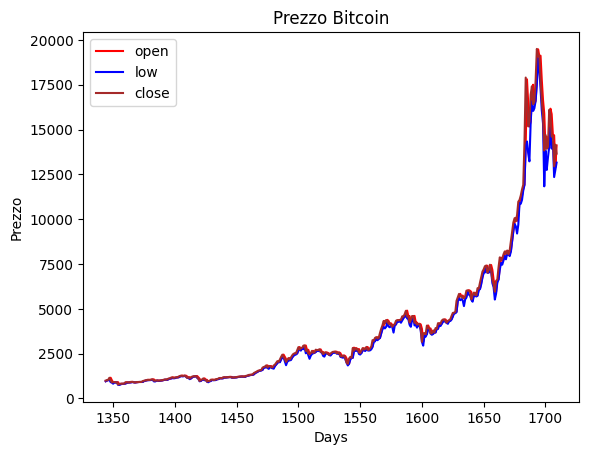

In [36]:
new_data_frame.plot(kind='line', color=['red','blue','brown'])
plt.title("Prezzo Bitcoin")
plt.xlabel('Days')
plt.ylabel('Prezzo')
plt.show()

* sull'asse delle x l'indice di quel giorno nel DataSet